In [1]:
import pandas as pd

In [2]:
twitter = pd.read_csv("twitter.csv", header = None,names=['id','title','author_id','new_created','users'])

In [3]:
twitter['new_created'] = pd.to_datetime(twitter['new_created'])

In [5]:
twitter['collected_on'] = twitter['new_created'].dt.date

In [6]:
twitter.head()

,id,title,author_id,new_created,users,collected_on
0,1589423569410236416,"RT @estella_dawn: @TRBOX33 @TRBOX33 Nawww, tha...",136314158,2022-11-07 01:04:43,"[{""created_at"": ""2010-04-23T15:45:59.000Z"", ""i...",2022-11-07
1,1589423573592309760,RT @hsxsvgolden: @HarryTo100 Novi\n\nI’m votin...,1498075959928438784,2022-11-07 01:04:44,"[{""created_at"": ""2022-02-27T23:22:07.000Z"", ""i...",2022-11-07
2,1589423569393811456,#목소리_들어보고싶으면_마음_들어봤으면_인용후기 \n해줘 https://t.co/S...,1516331761608761345,2022-11-07 01:04:43,"[{""created_at"": ""2022-04-19T08:24:14.000Z"", ""i...",2022-11-07
3,1589423569406431234,やっと錬金できた！早く大魔導師になれるようにレベリング頑張ります！\n#ドラクエ\n#ドラゴ...,1584508214166847488,2022-11-07 01:04:43,"[{""created_at"": ""2022-10-24T11:33:07.000Z"", ""i...",2022-11-07
4,1589423569385435138,RT @Rconstantino: 👇 https://t.co/WO7qS4kdxE,56362089,2022-11-07 01:04:43,"[{""created_at"": ""2009-07-13T12:42:37.000Z"", ""i...",2022-11-07


In [7]:
reddit = pd.read_csv("reddit_db.csv")

In [8]:
reddit.drop(labels=['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [9]:
reddit['new_created'] = pd.to_datetime(reddit['new_created'])

In [10]:
reddit['collected_on'] = reddit['new_created'].dt.date

In [11]:
reddit.head()

,title,score,id,subreddit,url,num_comments,created,new_created,collected_on
0,Europe prepares to rewrite the rules of the In...,1,yhgadn,technology,https://arstechnica.com/tech-policy/2022/10/eu...,0,1.667142e+09,2022-10-30 10:56:16,2022-10-30
1,Joe Rogan praises Elon Musk for wanting to bri...,1,yhg5l6,technology,https://www.businessinsider.com/joe-rogan-musk...,0,1.667141e+09,2022-10-30 10:50:30,2022-10-30
2,Check Out My Last Post To Get 15 Free Stocks 🤑🤠,1,yhfyjb,technology,/r/Freestockss/comments/yhfv74/check_out_my_la...,1,1.667141e+09,2022-10-30 10:41:49,2022-10-30
3,Don't miss the chance to get your free stocks!...,1,yhfhce,technology,https://a.webull.com/FvOtef4yjep7LrfFVk,1,1.667140e+09,2022-10-30 10:21:14,2022-10-30
4,Metapol - the World's First Global Web3 Cyber ...,1,yhfbyp,technology,https://metapol.army/contests/,0,1.667139e+09,2022-10-30 10:14:34,2022-10-30


In [12]:
hacker_news = pd.read_csv("hn_data.csv", header = None,names=['id','by','descendants','score','time','title','url'])

In [13]:
from datetime import datetime
hacker_news['new_created']=hacker_news['time'].map(lambda x: str(datetime.fromtimestamp(x)))

In [14]:
hacker_news['new_created'] = pd.to_datetime(hacker_news['new_created'])

In [15]:
hacker_news['collected_on'] = hacker_news['new_created'].dt.date

In [16]:
hacker_news.head()

,id,by,descendants,score,time,title,url,new_created,collected_on
0,33490883,zhengiszen,0,1,1667728272,GitHub – kelleyma49/PSFzf: A PowerShell wrappe...,https://github.com/kelleyma49/PSFzf,2022-11-06 04:51:12,2022-11-06
1,33490897,corentin88,0,3,1667728447,Why did Google remove the “I'm Feeling Lucky” ...,https://www.quora.com/Why-did-Google-remove-th...,2022-11-06 04:54:07,2022-11-06
2,33490948,zeristor,1,2,1667728948,Asterank,http://www.asterank.com/,2022-11-06 05:02:28,2022-11-06
3,33490956,l-m-z,0,1,1667729045,An OCaml port of min-DALLE,https://github.com/ArulselvanMadhavan/mini_dalle,2022-11-06 05:04:05,2022-11-06
4,33491056,homarp,0,1,1667729865,Being Glue,https://noidea.dog/glue,2022-11-06 05:17:45,2022-11-06


In [17]:
hacker_news['platform']='Hacker News'
reddit['platform']='Reddit'
twitter['platform']='Twitter'

In [18]:
DB_df=pd.concat([reddit, twitter,hacker_news])

In [19]:
DB_df['collected_date']=pd.to_datetime(DB_df['new_created'], format='%Y-%m-%d')

In [21]:
import matplotlib.pyplot as pl

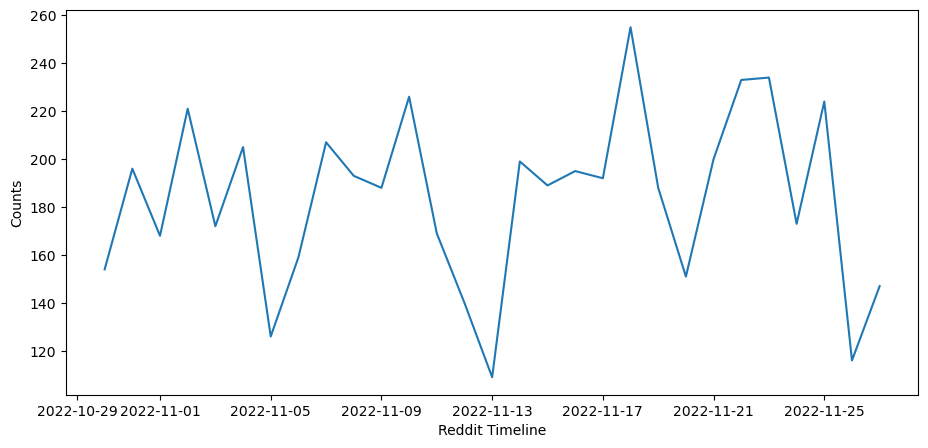

In [22]:
pl.figure(figsize=(11, 5))
reddit['collected_on'].value_counts().plot()

pl.xlabel('Reddit Timeline')
pl.ylabel('Counts')

pl.show()

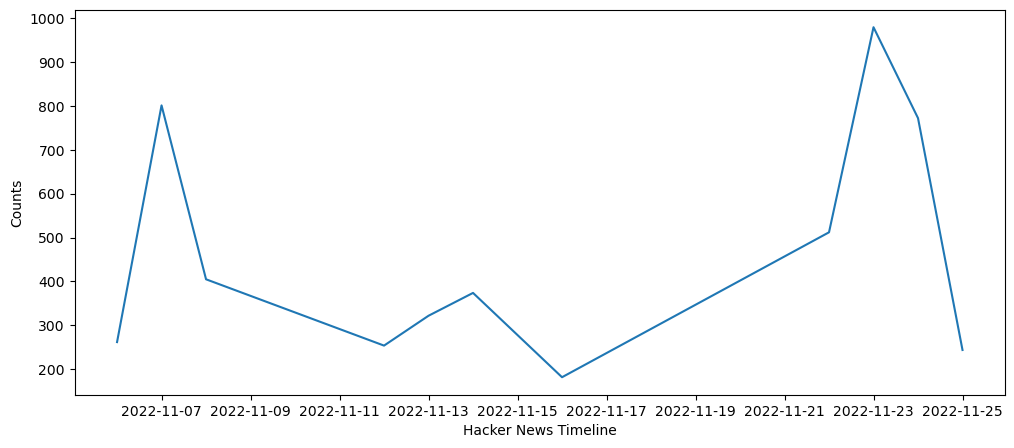

In [23]:
pl.figure(figsize=(12, 5))
hacker_news['collected_on'].value_counts().plot()

pl.xlabel('Hacker News Timeline')
pl.ylabel('Counts')

pl.show()

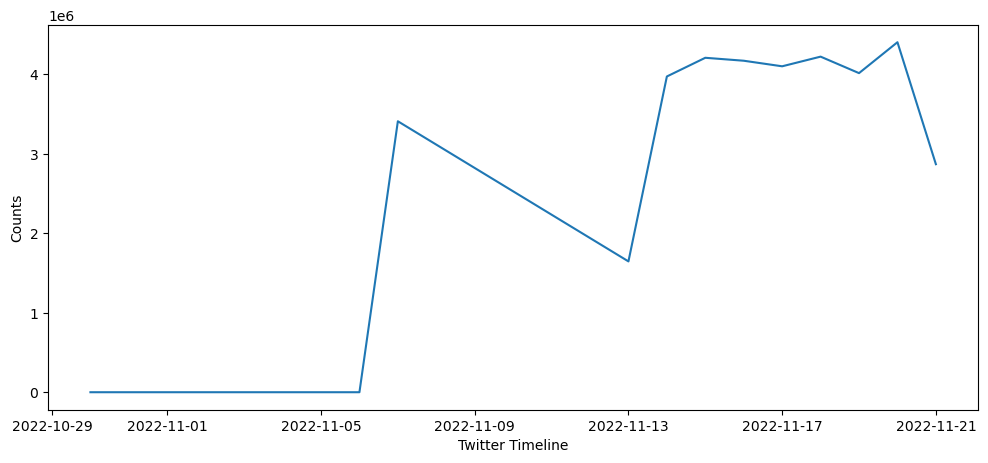

In [24]:
pl.figure(figsize=(12, 5))
twitter['collected_on'].value_counts().plot()

pl.xlabel('Twitter Timeline')
pl.ylabel('Counts')

pl.show()

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment_lib = SentimentIntensityAnalyzer()

In [26]:
def get_score(x):
    try:
        val = sentiment_lib.polarity_scores(x)['compound']
    except:
        val = None
    return val

In [27]:
def get_class(x):
    if x==0:
        return 'Neutral'
    elif x<0:
        return 'Negative'
    else:
        return 'Positive'

In [28]:
DB_df['sentiment_analysis_score'] = DB_df['title'].apply(lambda x:get_score(str(x)))

In [29]:
DB_df["class"] = DB_df['sentiment_analysis_score'].apply(lambda x: get_class(x))

In [30]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

import dash
from dash.dependencies import Input, Output
from dash import html,dcc
import dash_bootstrap_components as dbc

In [31]:
postive_score=len(DB_df[DB_df['class']=='Positive'])*100/len(DB_df)
negative_score=len(DB_df[DB_df['class']=='Negative'])*100/len(DB_df)
neutral_score=len(DB_df[DB_df['class']=='Neutral'])*100/len(DB_df)

In [32]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
stop_words = set(stopwords.words("english"))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriharsha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sriharsha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sriharsha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [87]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [127]:
def get_corpus(df):
    corpus = []
    df['word_count'] = df['title'].apply(lambda x: len(str(x).split(" ")))
    ds_count = len(df.word_count)
    for i in range(0, ds_count):
        try:
            # Remove punctuation
            text = re.sub('[^a-zA-Z]', ' ', str(df['title'][i]))

            # Convert to lowercase
            text = text.lower()

            # Remove tags
            text=re.sub("</?.*?>"," <> ",text)

            # Remove special characters and digits
            text=re.sub("(\\d|\\W)+"," ",text)

            # Convert to list from string
            text = text.split()

            # Stemming
            ps=PorterStemmer()

            # Lemmatisation
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in  
                    stop_words] 
            text = " ".join(text)
        except:
            text=''
        corpus.append(text)
    return corpus

In [107]:
import datetime
value1='2022-10-29'
value2='2022-12-5'
start_date = datetime.date(int(value1.split('-')[0]),int(value1.split('-')[1]),int(value1.split('-')[2]))
end_date = datetime.date(int(value2.split('-')[0]),int(value2.split('-')[1]),int(value2.split('-')[2]))

In [211]:
def get_plat_total(plat='Reddit',cltype='Neutral',st_date=start_date,ed_date=end_date,df_t=DB_df):
    if plat == 'All':
        c=len(df_t)
        return len(df_t.loc[ df_t['class']== cltype])*100/c
    else:
        df_t = df_t.loc[df_t['platform']==plat]
        c=len(df_t)
        return len(df_t.loc[ df_t['class']== cltype])*100/c

In [212]:
def fig_world_trend(plat='Reddit',st_date=start_date,ed_date=end_date,df_t=DB_df):

    df1=df_t[df_t['platform']==plat]
    df_grouped = (
        df1.groupby(
            df1['collected_on']
        )['platform'].count().rename('Count').to_frame()
    )

    fig = px.line(
        df_grouped, y='Count', title='Daily collected posts trend for {}'.format(plat),height=600,color_discrete_sequence =['maroon'],hover_data=['Count']
    )
    fig.update_layout(title_x=0.5,plot_bgcolor='#F2DFCE',paper_bgcolor='#F2DFCE',xaxis_title="Date",yaxis_title='count')
    return fig


In [213]:
def get_wordcloud_fig(plat='Reddit',st_date=start_date,ed_date=end_date,df_t=DB_df):
    corp_df = df_t.loc[df_t['platform']==plat]
    corpus=get_corpus(corp_df)
    wordcloud = WordCloud(
                              background_color='white',
                              stopwords=stop_words,
                              max_words=100,
                              max_font_size=50, 
                              random_state=42
                             ).generate(str(corpus))
    
    fig= px.imshow(wordcloud,title='word cloud for {}'.format(plat))
    fig.update_yaxes(visible=False, showticklabels=False)
    fig.update_xaxes(visible=False, showticklabels=False)
    fig.update_layout(title_x=0.5,plot_bgcolor='#F2DFCE',paper_bgcolor='#F2DFCE')
    return fig

In [214]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

def plot_top_words(plat='Reddit',st_date=start_date,ed_date=end_date,df_t=DB_df):
    corp_df = df_t[df_t['platform']==plat]
    corpus=get_corpus(corp_df)
    top_words = get_top_n_words(corpus, n=20)
    top_df = pd.DataFrame(top_words)
    top_df.columns=["Keyword", "Frequency"]

    fig = px.bar(top_df,x='Keyword', y='Frequency', title='Top terms in trend for {}'.format(plat))
    fig.update_layout(title_x=0.5,xaxis_title='Words',yaxis_title='count',plot_bgcolor='#F2DFCE',paper_bgcolor='#F2DFCE')
    fig.update_xaxes(tickangle=45)
    return fig

In [229]:
external_stylesheets = [dbc.themes.BOOTSTRAP]

In [230]:
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Anlaysis of trends'

In [231]:
colors = {
    'background': '#111111',
    'bodyColor':'#F2DFCE',
    'text': '#7FDBFF'
}
def get_page_heading_style():
    return {'backgroundColor': colors['background']}


def get_page_heading_title():
    return html.H1(children='Anlaysis of trends',
                                        style={
                                        'textAlign': 'center',
                                        'color': colors['text']
                                    })

def get_page_heading_subtitle():
    return html.Div(children='Visualize Anlaysis of trends data generated from sources Twitter, Reddit and Hacker News.',
                                         style={
                                             'textAlign':'center',
                                             'color':colors['text']
                                         })

def generate_page_header():
    main_header =  dbc.Row(
                            [
                                dbc.Col(get_page_heading_title(),md=12)
                            ],
                            align="center",
                            style=get_page_heading_style()
                        )
    subtitle_header = dbc.Row(
                            [
                                dbc.Col(get_page_heading_subtitle(),md=12)
                            ],
                            align="center",
                            style=get_page_heading_style()
                        )
    header = (main_header,subtitle_header)
    return header

In [232]:
def get_plat_list():
    f=DB_df['platform'].unique()
#     f.append('All')
    return f

def create_dropdown_list(plat_list):
    dropdown_list = []
    for plat in sorted(plat_list):
        tmp_dict = {'label':plat,'value':plat}
        dropdown_list.append(tmp_dict)
    return dropdown_list

def get_plat_dropdown(id):
    return html.Div([
                        html.Label('Select Platform'),
                        dcc.Dropdown(id='my-id'+str(id),
                            options=create_dropdown_list(get_plat_list()),
                            value='Reddit'
                        ),
                        html.Div(id='my-div'+str(id))
                    ])

In [233]:
from datetime import datetime as dt

def get_dates():
    return html.Div([
        dcc.DatePickerRange(
            id='my-date-picker-range',  # ID to be used for callback
            calendar_orientation='horizontal',  # vertical or horizontal
            day_size=39,  # size of calendar image. Default is 39
            end_date_placeholder_text="Return",  # text that appears when no end date chosen
            with_portal=False,  # if True calendar will open in a full screen overlay portal
            first_day_of_week=0,  # Display of calendar when open (0 = Sunday)
            reopen_calendar_on_clear=True,
            is_RTL=False,  # True or False for direction of calendar
            clearable=True,  # whether or not the user can clear the dropdown
            number_of_months_shown=1,  # number of months shown when calendar is open
            min_date_allowed=dt(2022, 10, 29),  # minimum date allowed on the DatePickerRange component
            max_date_allowed=dt(2022, 12, 5),  # maximum date allowed on the DatePickerRange component
            initial_visible_month=dt(2022, 10, 1),  # the month initially presented when the user opens the calendar
            start_date=dt(2022, 10, 29).date(),
            end_date=dt(2022, 12, 5).date(),
            display_format='MMM Do, YY',  # how selected dates are displayed in the DatePickerRange component.
            month_format='MMMM, YYYY',  # how calendar headers are displayed when the calendar is opened.

            persistence=True,
            persisted_props=['start_date'],
            persistence_type='session',  # session, local, or memory. Default is 'local'

            updatemode='singledate'  # singledate or bothdates. Determines when callback is triggered
        )
    ])

In [234]:
def graph1():
    return dcc.Graph(id='graph1',figure=fig_world_trend(plat='Reddit'))

In [235]:
def graph2():
    return dcc.Graph(id='graph2',figure=get_wordcloud_fig(plat='Reddit'))

In [236]:
def graph3():
    return dcc.Graph(id='graph3',figure=plot_top_words(plat='Reddit'))

In [237]:
def generate_card_content(card_header,card_value,overall_value):
    card_head_style = {'textAlign':'center','fontSize':'150%'}
    card_body_style = {'textAlign':'center','fontSize':'200%'}
    card_header = dbc.CardHeader(card_header,style=card_head_style)
    card_body = dbc.CardBody(
        [
            html.H5(f"{int(card_value):,}", className="card-title",style=card_body_style),
            html.P(
                "Across all Platform: {:,}".format(overall_value),
                className="card-text",style={'textAlign':'center'}
            ),
        ]
    )
    card = [card_header,card_body]
    return card

In [238]:
def generate_cards(plat='Reddit',st_date=start_date,ed_date=end_date,df_t=DB_df):
    net_plat_total = get_plat_total(plat,'Neutral',st_date,ed_date,df_t)
    neg_plat_total = get_plat_total(plat,'Negative',st_date,ed_date,df_t)
    pos_plat_total = get_plat_total(plat,'Positive',st_date,ed_date,df_t)
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Positive",pos_plat_total,postive_score), color="success", inverse=True),md=dict(size=2,offset=3)),
                    dbc.Col(dbc.Card(generate_card_content("Neutral",net_plat_total,neutral_score), color="warning", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Negative",neg_plat_total,negative_score),color="dark", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
    )
    return cards

In [239]:

def generate_layout():
    page_header = generate_page_header()
    layout = dbc.Container(
        [
            page_header[0],
            page_header[1],
            html.Hr(),
            generate_cards(),
            html.Hr(),
            dbc.Row(
                [
                    dbc.Col(get_dates(),md=dict(size=4,offset=4))                    
                ]
            ),
            dbc.Row(
                [
                    dbc.Col(get_plat_dropdown(id=1),md=dict(size=4,offset=4))                    
                ]
            ),
            dbc.Row(
                [                
                    dbc.Col(graph1(),md=dict(size=6,offset=3))
                ],
                align="center",

            ),
            dbc.Row(
                [                
                    dbc.Col(graph2(),md=dict(size=6,offset=3))
                ],
                align="center",

            ),
            dbc.Row(
                [                
                    dbc.Col(graph3(),md=dict(size=6,offset=3))
                ],
                align="center",

            ),
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout


In [240]:
app.layout = generate_layout()

/var/folders/bz/c11d48jx64jdqdm5ntzmyt100000gn/T/ipykernel_14614/3463299306.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bz/c11d48jx64jdqdm5ntzmyt100000gn/T/ipykernel_14614/3463299306.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [241]:
@app.callback(
    [Output(component_id='graph1',component_property='figure'), #line chart
     Output(component_id='graph2',component_property='figure'),
     Output(component_id='graph3',component_property='figure'),
    Output(component_id='card1',component_property='children')], #overall card numbers
    [Input(component_id='my-id1',component_property='value'),
    Input(component_id='my-date-picker-range', component_property='start_date'),
    Input(component_id='my-date-picker-range', component_property='end_date')] #dropdown
)
def update_output_div(input_value1,input_value2,input_value3):
    s_d=DB_df.loc[(DB_df['collected_date'] >= input_value2) & (DB_df['collected_date'] < input_value3) & (DB_df['platform'] == input_value1)]
    print('btw',len(s_d))
    return fig_world_trend(input_value1,input_value2,input_value3,s_d),get_wordcloud_fig(input_value1,input_value2,input_value3,s_d),plot_top_words(input_value1,input_value2,input_value3,s_d),generate_cards(input_value1,input_value2,input_value3,s_d)

In [242]:
app.run_server(host= '0.0.0.0',debug=False)

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.1.122:8050/ (Press CTRL+C to quit)
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET / HTTP/1.1" 200 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-component-suites/dash/dcc/async-datepicker.js HTTP/1.1" 304 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-layout HTTP/1.1" 200 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
192.168.1.122 - - [13/Dec/2022 11:18:35] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
192.168.1.1

btw 5329


192.168.1.122 - - [13/Dec/2022 11:18:37] "POST /_dash-update-component HTTP/1.1" 200 -


btw 37012845


192.168.1.122 - - [13/Dec/2022 12:13:24] "GET / HTTP/1.1" 200 -
